In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

9.649375
6.2410942864079315
4.999768801835564
3.3593104071343287
2.3925103124582443
2.2581561415618676
1.4494532631868244
1.544422827546142
1.0842036646257005
0.7743698058333331
0.7469487744527061
0.4835363018527463
0.737357064435331
0.6014048435175008
0.4723359273208873
0.4500009176605768
0.3002586113148924
0.5311202854485371
0.49813530472512546
0.4265564999011065
0.3972930872145123
0.27093114072750174
0.4710248836228122
0.4756126078842257
0.42504155448199216
0.39066032651016314
0.26897251599542366
0.45067012907374004
0.47044248415651174
0.428373957517087
0.3912508786256349
0.27044490163610313
0.44279173413810347
0.4690801367323917
0.4306689473732627
0.3922204201148051
0.27156605005287693
0.4394246917021355
0.46858876185324644
0.43179987765325795
0.39274475342431875
0.2721196525218567
0.4378722773183048
0.4683122400207841
0.4322515230937434
0.3929342456546311
0.2723270226930478
0.437098892314732
0.4680953642933751
0.4323608759247856
0.39294259502309453
0.27235739954894517
0.4366717958

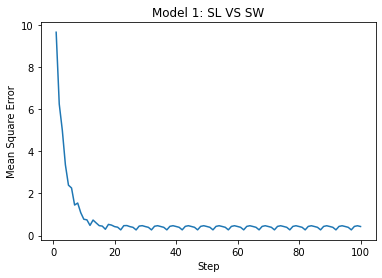

In [3]:
#Reading dataset using pandas
df=pd.read_csv('iris.csv')

#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.length']]
#Target data
Y_train=training_data['sepal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
#To store the Errors
mse_list=[]

#training for 100 steps
epochs=20
#Samples in train dataset
n_samples=135
k=0
# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the mse for every batch
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 1: SL VS SW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.length']]
Y_test=test_data['sepal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 1): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 1: ",model.score(X_test,Y_test))

14.497187499999999
14.8951893015831
10.692285633398553
6.046168180433175
1.9722016609001816
4.152568616083304
4.994075338654062
3.6840973713104916
2.577051777197521
1.7588675751159617
2.2570521080670995
2.5984554936692
1.9833865630481435
1.9101122123113377
2.2592257625508654
1.9911306954271226
1.9533292700234588
1.523328219403759
1.7997159454699494
2.615846000312515
1.9968045751071977
1.7529842201689918
1.3796675170362824
1.7902068512044815
2.8063373869647137
2.0261659920581083
1.6809109031577933
1.3276955434679056
1.7942539031724318
2.899211224532853
2.044977276379865
1.6516820970699828
1.3064965590340394
1.7975797337800696
2.942683473000649
2.0543918267565884
1.6387414641359963
1.2970388957578527
1.7991007778371146
2.9624749118937284
2.0585209923184684
1.6325701916331112
1.2924714750222699
1.799479963900978
2.9711691749165774
2.060014825596073
1.6293603326863413
1.2900457594702988
1.7992681679896783
2.9747149550354597
2.0602532776945957
1.6274808685733113
1.288582683069942
1.79877086

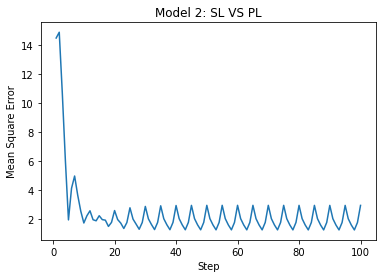

In [4]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.length']]
#Target data
Y_train=training_data['petal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 2: SL VS PL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.length']]
Y_test=test_data['petal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 2): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 2: ",model.score(X_test,Y_test))

1.8628125
1.4542795136200448
1.2309217553842
0.9183538239481124
0.880032894265952
0.6803700097532943
0.5592373762904082
0.6270179169755543
0.4920673052005595
0.44599196444811096
0.45222791202609697
0.3640239196830901
0.49558391174184147
0.40554481362072664
0.3250040767955669
0.4137490589464159
0.319802354511482
0.4658855124712729
0.38877409638365257
0.28593030478715864
0.4099851036465877
0.3090125509698845
0.4586227681346161
0.3858523478589343
0.2714351691305788
0.4111247359492186
0.30600834752520567
0.4565458254579601
0.38545820326181135
0.26547739008636295
0.4121904503275766
0.30498485640609874
0.4557721479092307
0.38541707655275415
0.2628597695262374
0.412732329629107
0.30453495956233073
0.45536988066078876
0.3853678140667025
0.26165331150918253
0.41293055066631706
0.30427771090262984
0.45509041456230914
0.38527894720527733
0.26106886190603257
0.41294931905649535
0.3040940630867976
0.4548573537557227
0.3851643632478895
0.2607645057087833
0.41288118747804103
0.30394112362681647
0.454

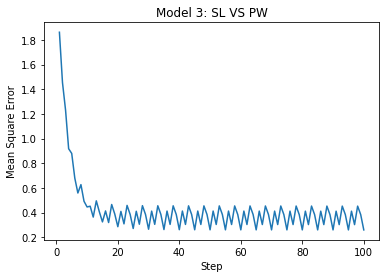

In [5]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.length']]
#Target data
Y_train=training_data['petal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 3: SL VS PW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.length']]
Y_test=test_data['petal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 3): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 3: ",model.score(X_test,Y_test))

36.7759375
30.545940847457086
28.389643425991864
26.25693413904004
23.016817823690417
24.629538934759786
19.89587461301277
18.678647014968742
17.897721334100794
15.502945905165761
16.648378609865038
13.095033094725348
12.433154096589057
12.410921919675172
10.605779626967479
11.389345912795386
8.770493013866439
8.42547203654881
8.800163018766845
7.410740603416529
7.91225395447678
6.035545025967364
5.861087474020437
6.416537195378349
5.323551424632597
5.603991919473894
4.318169106132949
4.22615997364616
4.837066502143093
3.957934885618412
4.064276135536193
3.2498912542817653
3.188642252099834
3.785748633964313
3.062711647496839
3.0313999147400708
2.5937905409324573
2.5341826704374015
3.0822518809607953
2.4744693774711513
2.33396068772773
2.1978858145753764
2.1245850846227468
2.6085653286691146
2.0868299506520915
1.8594616290624062
1.9649711748665692
1.8708958440716486
2.287311466460364
1.8304909613993343
1.5338775189585818
1.8331088863637413
1.71597405385974
2.0676356044228443
1.66026177

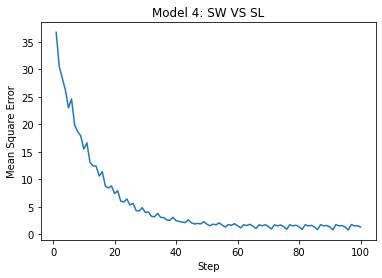

In [6]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.width']]
#Target data
Y_train=training_data['sepal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 4: SW VS SL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.width']]
Y_test=test_data['sepal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 4): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 4: ",model.score(X_test,Y_test))

16.78875
16.5197775455959
16.647438702454004
12.649942632861816
8.223846327501274
12.387014399536863
12.133055817287548
12.590644843510388
9.535782745578807
6.001401342818535
9.512943170366821
9.251179228783215
9.92559879779881
7.545344956634734
4.709190787760844
7.634039820247844
7.353079847778016
8.170371910594032
6.2785207926603785
3.991751867247298
6.403835883844861
6.099051014977592
7.010779957529442
5.476621979383101
3.623893815911818
5.596820325326658
5.267439642400385
6.241827221759679
4.972593437267781
3.463944198781745
5.066145890692367
4.713473152516888
5.7296241605031915
4.658715627933114
3.423591244750144
4.7161365758663765
4.342475017905956
5.386613829613499
4.465659897243031
3.448465940160183
4.484413893243013
4.092434951495769
5.155450846141788
4.348912052105382
3.5056674614936836
4.330274594776862
3.9226620512271095
4.998506702820631
4.279976862035911
3.5757721412943693
4.227131740374224
3.806394325885496
4.891034451124742
4.240683766647048
3.647733228136262
4.15759719

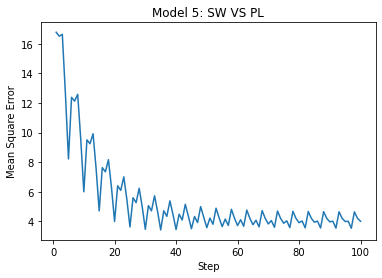

In [7]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.width']]
#Target data
Y_train=training_data['petal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 5: SW VS PL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.width']]
Y_test=test_data['petal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 5): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 5: ",model.score(X_test,Y_test))

1.598125
2.3204301647632595
2.0636093830848976
1.4384658432187327
1.1579985158478396
1.2131789748773292
1.8312039272648573
1.636768522874927
1.1282376390642228
0.9581384770617455
0.9780311632608532
1.495200407059973
1.3491877591043322
0.9329833802951177
0.8529565937692448
0.8373640864580709
1.2622992011500667
1.1541062101166233
0.811237921850197
0.8045280381491106
0.7557679051474454
1.0992330688183731
1.020736535107344
0.7362768478621435
0.7891196189304728
0.7106713404347537
0.983826154689489
0.9287535312225026
0.6909162799467886
0.7920481797557269
0.6877648680023758
0.9012211447342116
0.8646952089299464
0.6641395606785532
0.804371220450905
0.6780409232025211
0.8414050073091746
0.8196105784009725
0.6489104787879181
0.8207625359956385
0.6758825834987715
0.7975833284204872
0.7875205602084294
0.640756862119614
0.838153198329364
0.6778315588668047
0.7651097783247698
0.7644095625343061
0.6368541075797987
0.8548659542766696
0.681795877054709
0.7407792104643224
0.7475636541956537
0.6354329655

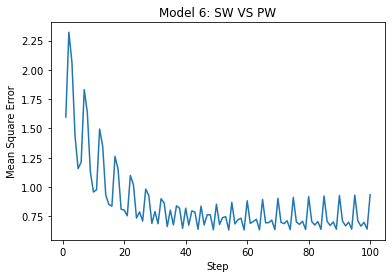

In [8]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.width']]
#Target data
Y_train=training_data['petal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['sepal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 6: SW VS PW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.width']]
Y_test=test_data['petal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 6): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 6: ",model.score(X_test,Y_test))

36.7546875
28.34759191580991
23.825572454142467
21.11724748176056
22.503993995214262
18.664996098969475
15.431505761692641
13.029635203359847
11.722228459698727
9.743016928578678
10.234223790952178
9.244064449514841
7.890095605319816
7.2074171338800195
4.114074030324747
6.323619808410215
6.25663125825316
5.4304098478637055
5.017851175879022
1.724425217686388
4.520758893719448
4.796611166739129
4.24285990738613
3.941061660598429
0.7775624348379516
3.6955141764459603
4.069432275538724
3.660892044818812
3.4001163256906377
0.4531369979413206
3.3201152293461087
3.6964372126189593
3.368357229480396
3.1194396584925044
0.3826508463170426
3.1492271449502756
3.496363724800692
3.2149420231741535
2.9666884928852184
0.40487950476613366
3.069588066571747
3.3818924493304996
3.1289347582518787
2.877825113276295
0.45236999705689207
3.0294514284752774
3.3105882942234093
3.075958127429117
2.821540483360806
0.49917269494146366
3.0055537100954233
3.2615802401745464
3.039421428033557
2.7823121646319766
0.53

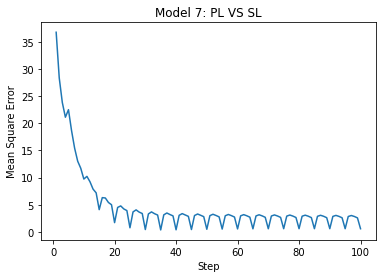

In [9]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.length']]
#Target data
Y_train=training_data['sepal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 7: PL VS SL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.length']]
Y_test=test_data['sepal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 7): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 7: ",model.score(X_test,Y_test))

9.44375
8.677929241215077
7.814325511632074
6.055516125619696
4.475839284963627
5.1347801282229435
5.541339206748869
5.0312020677464915
3.9510100953011063
2.523677162182575
3.1452601903398425
4.034669525503559
3.6873247758867853
2.979889651554065
1.6392232561914273
2.2311026426084073
3.3006742510310874
3.0277084600745416
2.5324915964615315
1.243839604149533
1.8132371566494057
2.934978883230507
2.6956008445258637
2.325578390428047
1.070072054139284
1.6228575419079396
2.7461968681968827
2.521732072194714
2.228045874995384
0.9950570035389797
1.5356806695911385
2.6433153678959584
2.425317829668802
2.1795419130340674
0.9628761258569548
1.4945855030162614
2.582762770111542
2.3674865989846534
2.1525147994327964
0.9484429886376002
1.473554366094946
2.5434842374624975
2.3293216741553766
2.134547359895099
0.9407580262612315
1.4608998262022963
2.5151753301366635
2.3014758349142124
2.120156113936832
0.9351796154258608
1.4514858946055045
2.492706887993031
2.2792373140817794
2.106999712937438
0.9298

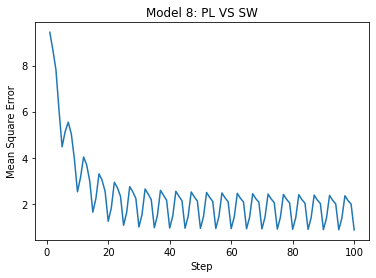

In [10]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.length']]
#Target data
Y_train=training_data['sepal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 8: PL VS SW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.length']]
Y_test=test_data['sepal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 8): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 8: ",model.score(X_test,Y_test))

1.8809375000000002
1.623958210903978
1.2275792720073586
1.4321607290035177
1.5205655208609976
0.9122121865113086
0.801638043577983
0.60943032539796
0.7337270566329925
0.7509324302684222
0.45851641442697666
0.41419046396441606
0.324588977501464
0.39731152563714994
0.3827106500272749
0.24660957068100217
0.23161469971669996
0.19474006391056412
0.23375764726674952
0.20539817771464713
0.1480166027696138
0.14554400883386853
0.13650617645412103
0.15321570991025812
0.11924349022494304
0.10239193614983116
0.10492452244413417
0.11104384983121388
0.11285713890987455
0.07686115420448991
0.0814335455218384
0.08570635398000145
0.10035538931393827
0.09216496364911816
0.05566283021216651
0.0718971606922926
0.07656213338336243
0.09617010278725549
0.08124145300818134
0.04482752794847994
0.06760518695324197
0.07215791584663808
0.09473493429604597
0.07526515144141055
0.039135459248578294
0.06569013311006612
0.06998279005505517
0.09438035885654932
0.07185615877299711
0.03604455324508343
0.06483064384528917

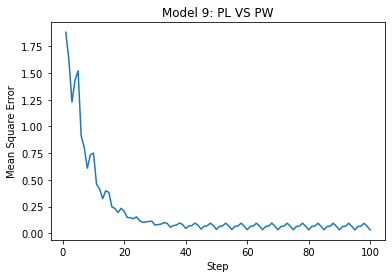

In [11]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.length']]
#Target data
Y_train=training_data['petal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.length'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 9: PL VS PW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.length']]
Y_test=test_data['petal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 9): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 9: ",model.score(X_test,Y_test))

35.791250000000005
32.72542010090912
33.11612360880501
32.58784202936626
31.832877156056444
32.09936683448238
29.59127414366774
29.774481454020474
29.417378560853653
28.747198173712842
28.80816709738924
26.7880080063901
26.789615005954577
26.581224796321322
25.989533214943553
25.874304745935582
24.280326403385708
24.1232875486836
24.04375658616228
23.5247490718279
23.259104934545732
22.036708675334165
21.741361569134234
21.77315787191455
21.321478893591898
20.928061751300312
20.029004633098832
19.613359267802622
19.74101301293029
19.351718349516286
18.850389892775855
18.23207370347634
17.712070190850454
17.92194278989469
17.590465094711117
16.998624488721536
16.62346273575737
16.0132009311133
16.29327940389033
16.01539689536767
15.34826390900313
15.183118325513512
14.495062387306822
14.834776291555029
14.60658426801289
13.877450939624499
13.893129956220562
13.138290554377283
13.528349024927223
13.34623393181515
12.566688209556137
12.73750065590097
11.925597249742092
12.357843964581516


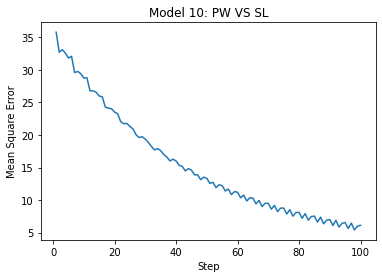

In [12]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.width']]
#Target data
Y_train=training_data['sepal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 10: PW VS SL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.width']]
Y_test=test_data['sepal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 10): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 10: ",model.score(X_test,Y_test))

9.57375
8.951149392584778
8.964299619563262
9.422597030756053
6.4601407276857445
8.757787859118903
8.096846188973144
8.20704025874351
8.662424838746261
5.825882953986055
8.026224205712484
7.334744100622759
7.528329045653971
7.98022630542302
5.259504875035799
7.370159632835121
6.654907528633527
6.9198642935111
7.367800604409314
4.753746635568596
6.78163683803306
6.048465158843875
6.374224238444851
6.817814095435266
4.3021219337381025
6.253540725461354
5.507496374114345
5.884773675801673
6.323708417441029
3.8988357535495326
5.779509110081799
5.024929764721374
5.445580508250339
5.879618333430598
3.538710839654094
5.353852898218914
4.594452449758675
5.051341153090207
5.480298291746543
3.2171219857356634
4.97148473831062
4.210429059291268
4.697313867964105
5.121056778390109
2.9299373063824063
4.627855242549945
3.867829349310147
4.379259154104226
4.797697633286253
2.6734657505184303
4.31889597562312
3.562163530838935
4.093386485550891
4.5064675912296295
2.444410193285325
4.040968492113363
3.

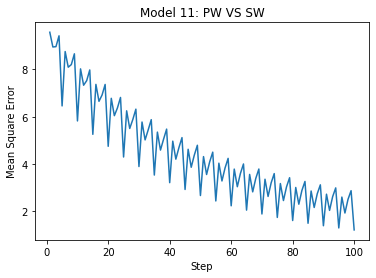

In [13]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.width']]
#Target data
Y_train=training_data['sepal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 11: PW VS SW")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.width']]
Y_test=test_data['sepal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 11): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 11: ",model.score(X_test,Y_test))

19.02875
14.547814120678979
13.425042833506643
18.775927811748936
15.798259739850321
17.07770498606966
13.027421026825072
11.980708759464086
16.81647412015436
14.10486953995923
15.331782233818016
11.668259810116108
10.691917417879312
15.06485123700247
12.593910348403385
13.76930681669677
10.453214627425051
9.542027366275303
13.499000012911187
11.245863125189098
12.37090012513747
9.366987394967905
8.516171598246032
12.099203573791144
10.043289991658067
11.11923625890733
8.39590469832529
7.601068670979743
10.847838557491897
8.970612724380059
9.998824280895688
7.527745215059689
6.784853918267761
9.729152774094771
8.013914803630835
8.995813585888493
6.7515854707267335
6.056928614033553
8.729066482915439
7.160764512846044
8.09781992961033
6.0576619805948875
5.4078251782946225
7.834994777468427
6.4000568514877685
7.293769924046265
5.437248036307291
4.829086720241275
7.035688836156751
5.721872261538086
6.5737620380918
4.882543581656266
4.31315939434214
6.321094034647642
5.117350380347294
5.92

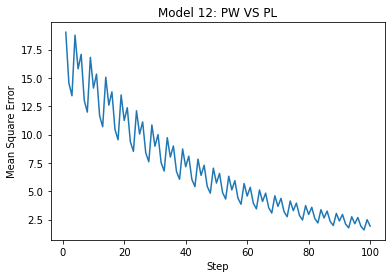

In [14]:
#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['petal.width']]
#Target data
Y_train=training_data['petal.length']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['petal.width'][i:i+32]+c
        D_m=(-2/n_samples)*((X_train['petal.width'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred))#Adding loss of each batch
        mse_list.append((k+1,mean_squared_error(Y_train[i:i+32],y_pred)))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 12: PW VS PL")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['petal.width']]
Y_test=test_data['petal.length']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 12): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 12: ",model.score(X_test,Y_test))

9.5271875
6.934308076952914
4.90618852900673
3.314810521973631
2.4934162932714683
2.5129918531763193
2.0328924568279496
1.5513363681429404
1.2299005159601002
0.98699309488464
1.1405907001794668
1.1025162039588354
0.9119582964182196
0.9114603595968498
0.7476607064000593
0.8988147083298891
0.9526515431909552
0.8075941115293623
0.8992672115469058
0.7326028280407046
0.8691976173702121
0.9418932154158128
0.7992134498348893
0.9215637105641716
0.7453664559449705
0.8724546289363504
0.9489116427217825
0.803440389955024
0.9373985636529811
0.7551141474101386
0.8772416874688441
0.9544073630398398
0.8068452921836426
0.9455869812946025
0.7601634095408081
0.8798828198053614
0.9571713577526657
0.8084853667851671
0.949284979547128
0.7623618723834219
0.8809416244773847
0.9582556569303322
0.8090247756671601
0.9507174018720741
0.7631071854048035
0.8811493755496475
0.9584802895118321
0.808998504289075
0.951067840117403
0.7631558112950745
0.8809407514417709
0.958292181264959
0.8087002568916188
0.95091332054

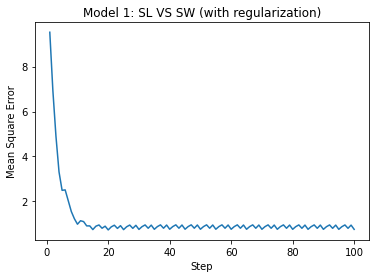

In [15]:
####Model 1-Sepal Length vs Sepal Width (with Regularization (L2 regularization))########

#Reading dataset using pandas
df=pd.read_csv('iris.csv')

#Storing the species data to evenly split
Y=df['variety']

#Splitting the data into train and test set
training_data,test_data=train_test_split(df,test_size=0.10,stratify=Y)

#Feature data
X_train=training_data[['sepal.length']]
#Target data
Y_train=training_data['sepal.width']

#Creating a Linear Regression Model and Fitting the Data
model=LinearRegression().fit(X_train,Y_train)

##Here, 
## m represents slope
## c represents intercept
## L represents learning rate
m=0
c=0

#Learning Rate
L=0.01
mse_list=[]

#training for 100 steps
epochs=20  
n_samples=135
k=0
l=2

# Performing Training using Gradient Descent 
for epoch in range(epochs):
    #To calculate the average of mean_squared_error for n samples
    sum=0
    for i in range(0,135,32):
        #Linear Equation
        y_pred=m*X_train['sepal.length'][i:i+32]+c
        reg_term=l*(m**2)
        D_m=(-2/n_samples)*((X_train['sepal.length'][i:i+32]*(Y_train[i:i+32]-y_pred)).sum())#Partial derivative of MSE wrt m
        D_c=(-2/n_samples)*((Y_train[i:i+32]-y_pred).sum())#Partial derivative of MSE wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
        print(mean_squared_error(Y_train[i:i+32],y_pred)+reg_term)#Adding loss of each batch
        mse=mean_squared_error(Y_train[i:i+32],y_pred)+reg_term
        mse_list.append((k+1,mse))
        k=k+1
        

plt.plot(*zip(*mse_list))
plt.title("Model 1: SL VS SW (with regularization)")
plt.xlabel("Step")
plt.ylabel("Mean Square Error")
#Calculating Accuracy on Test dataset
X_test=test_data[['sepal.length']]
Y_test=test_data['sepal.width']
y_test_pred=model.predict(X_test)
print("Mean Squared Error (Model 1): ",mean_squared_error(Y_test,y_test_pred))
print("Accuracy of Model 1: ",model.score(X_test,Y_test))